In [5]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This script combines the data from the UCI HAR Dataset into a more usable format.
# The data is combined into a single csv file for each subject and activity.
# The data is then stored in the Combined folder.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
import pandas as pd
import numpy as np
import os

# Give the path of the test and train folder of UCI HAR Dataset
train_path = "./UCI HAR Dataset/train"
test_path = "./UCI HAR Dataset/test"

# Dictionary of activities. Provided by the dataset.
ACTIVITIES = {
    1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'             ,
}

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Traing Data
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_y_train.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_z_train.txt"),delim_whitespace=True,header=None)


# Read the subject IDs
subject_train = pd.read_csv(os.path.join(train_path,"subject_train.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(train_path,"y_train.txt"),delim_whitespace=True,header=None)


# Toggle through all the subjects.
for subject in np.unique(subject_train.values):

    sub_idxs = np.where( subject_train.iloc[:,0] == subject )[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        # make the folder directory if it does not exist
        if not os.path.exists(os.path.join("Combined","Train",ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined","Train",ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:,0] == label].index

        accx = []
        accy = []
        accz = []

        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz,total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
        save_path = os.path.join("Combined","Train",ACTIVITIES[label],f"Subject_{subject}.csv")
        data.to_csv(save_path,index=False)

print("Done Combining the training data")


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Test Data
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_x_test.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_y_test.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_z_test.txt"),delim_whitespace=True,header=None)

# Read the subject IDs
subject_test = pd.read_csv(os.path.join(test_path,"subject_test.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(test_path,"y_test.txt"),delim_whitespace=True,header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_test.values):

        sub_idxs = np.where( subject_test.iloc[:,0] == subject )[0]
        labels = y.loc[sub_idxs]

        # Toggle through all the labels.
        for label in np.unique(labels.values):

            if not os.path.exists(os.path.join("Combined","Test",ACTIVITIES[label])):
                os.makedirs(os.path.join("Combined","Test",ACTIVITIES[label]))

            label_idxs = labels[labels.iloc[:,0] == label].index

            accx = []
            accy = []
            accz = []
            for idx in label_idxs:
                if accx is not None:
                    accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                    accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                    accz = np.hstack((accz,total_acc_z.loc[idx][64:]))

                else:
                    accx = total_acc_x.loc[idx]
                    accy = total_acc_y.loc[idx]
                    accz = total_acc_z.loc[idx]

            # saving the data into csv file
            data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
            save_path = os.path.join("Combined","Test",ACTIVITIES[label],f"Subject_{subject}.csv")
            data.to_csv(save_path,index=False)

print("Done Combining the testing data")
print("Done Combining the data")

#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Done Combining the training data
Done Combining the testing data
Done Combining the data


In [6]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)
print("Training data shape: ",y_train.shape)
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)
Training data shape:  (126,)


Task 1 Question 1

In [7]:
# dependencies
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


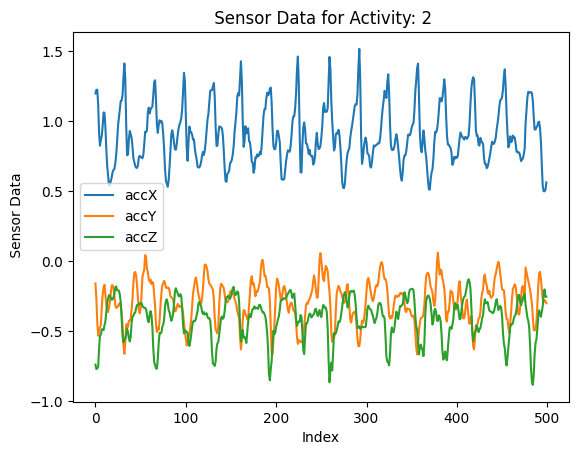

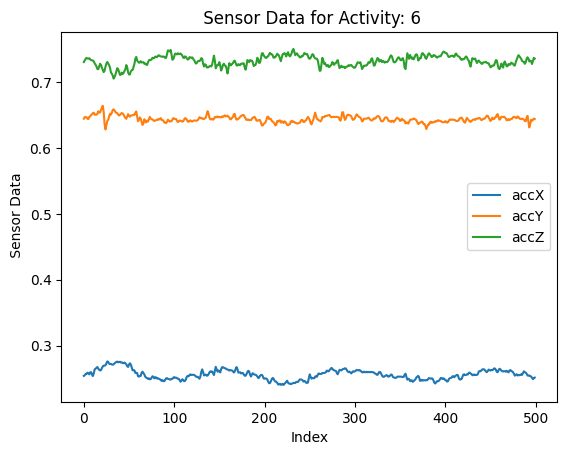

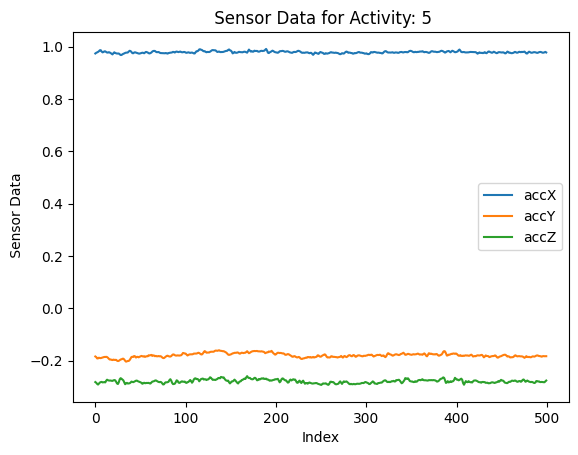

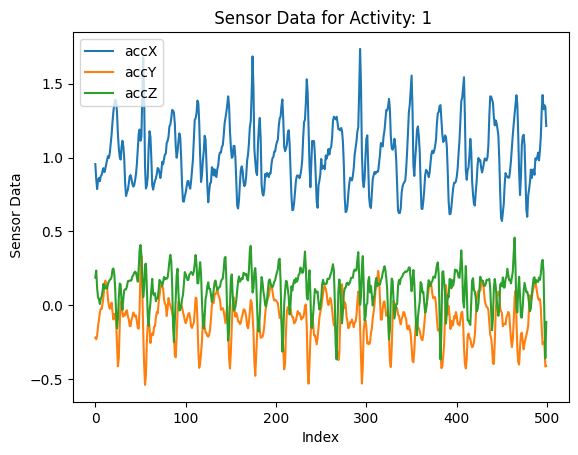

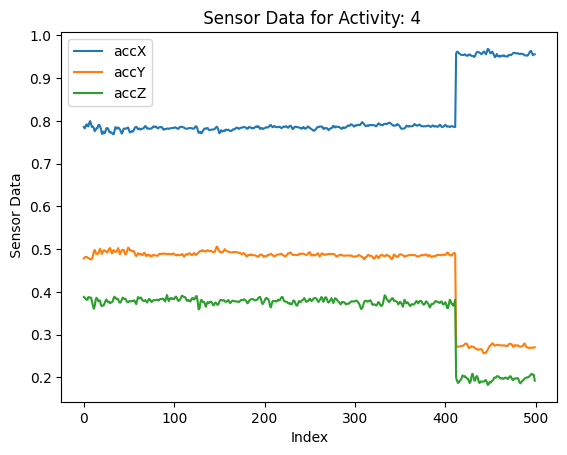

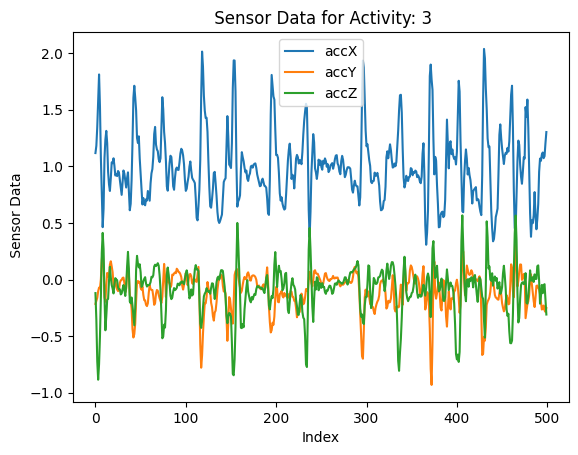

In [8]:
# made a dataframe to encorporate train and test data
df_A = pd.DataFrame({
    'Activity': y_train,
    'SensorData accX': [i for i in X_train[:,:,0]],
    'SensorData accY': [i for i in X_train[:,:,1]],
    'SensorData accZ': [i for i in X_train[:,:,2]]
})
# plotted one dataset from each activity
l=[]
for i in range(len(df_A)):
  act=df_A.loc[i,'Activity']
  if not(df_A.loc[i,'Activity'] in l):
    plt.figure()
    l.append(df_A.loc[i,'Activity'])
    plt.plot(df_A.loc[i,'SensorData accX'], label='accX')
    plt.plot(df_A.loc[i,'SensorData accY'], label='accY')
    plt.plot(df_A.loc[i,'SensorData accZ'], label='accZ')

    plt.title(f' Sensor Data for Activity: {act}')
    plt.xlabel('Index')
    plt.ylabel(' Sensor Data')
    plt.legend()
    plt.show()

We can see the difference in activities by seeing the variations in accelerations. Like walking upstairs, downstairs have high variations as compared to laying , sitting. As for various activities accelerations belong to a particular region, an ML model can classify them based on trend in accelerations

Task1 Question 2

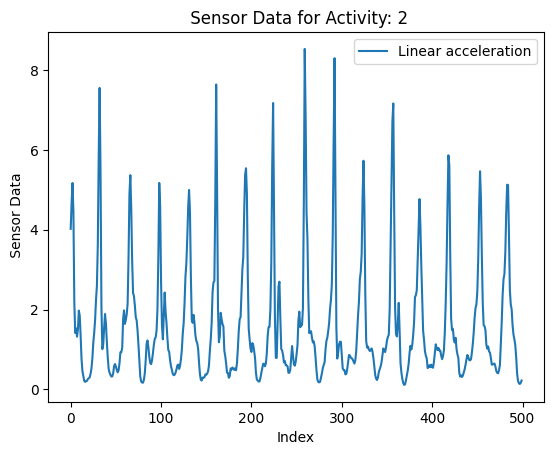

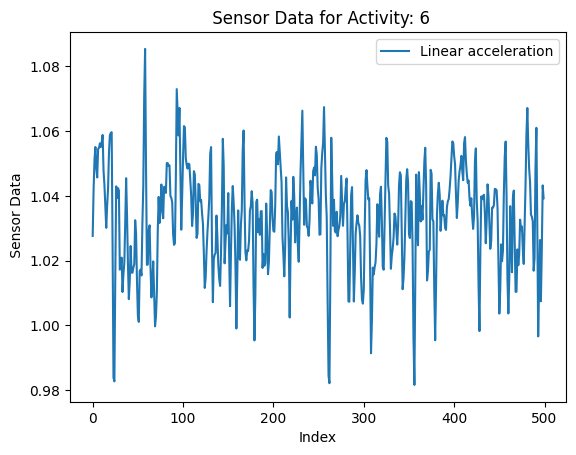

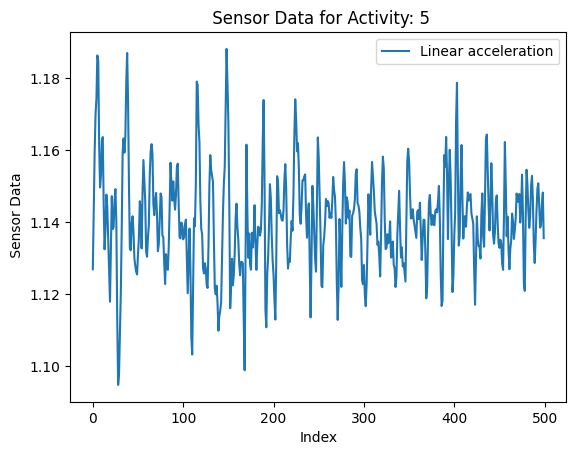

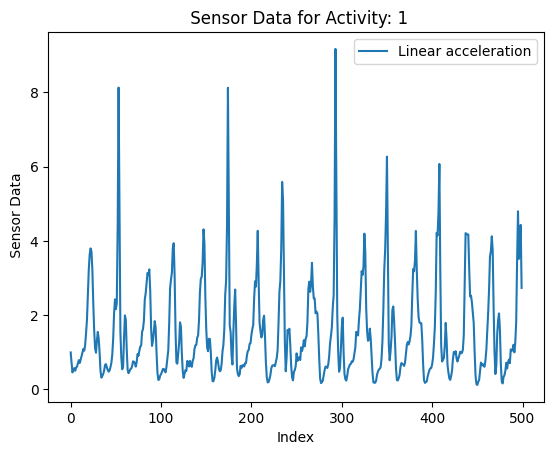

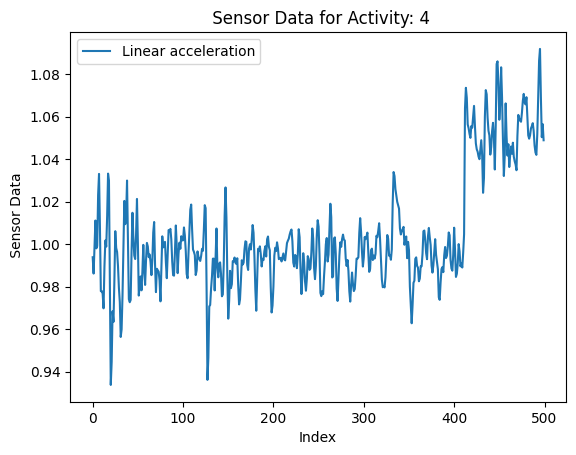

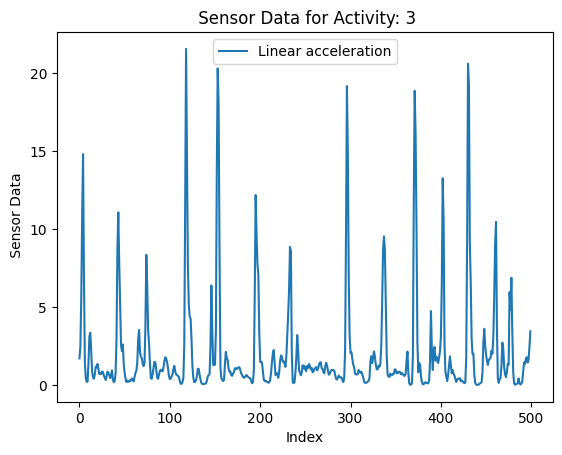

In [9]:
df_A['Linear acceleration']= np.power(np.array(df_A['SensorData accX'])**2+np.array(df_A['SensorData accY'])**2+np.array(df_A['SensorData accZ'])**2,2)
# for activity, group in df_A_Groupby:
#     print(f"Activity: {activity}")
#     median_linearacc = group['Linear acceleration'].apply(lambda x: pd.Series(x).median())
#     plt.plot(group.index, median_linearacc, label='median_linearacc', marker='o')
#     plt.show()

k=[]
for i in range(len(df_A)):
  act=df_A.loc[i,'Activity']
  if not(df_A.loc[i,'Activity'] in k):
    plt.figure()
    k.append(df_A.loc[i,'Activity'])
    plt.plot(df_A.loc[i,'Linear acceleration'], label='Linear acceleration')
    plt.title(f' Sensor Data for Activity: {act}')
    plt.xlabel('Index')
    plt.ylabel(' Sensor Data')
    plt.legend()
    plt.show()

Yes, we need a ML model to differentiate between static and dynamic activities because we have a very noisy data an a simle threshold based model will not perfectly classify the data

Task1 Question 3 Part 1


I have created a seperate dataframe for linear acceleration of 500 activities

In [10]:
dk=[]
for i in range(len(df_A)):
  dk.append(df_A.loc[i,'Linear acceleration'])

dk=np.array(dk)

PCA on linear acceleration

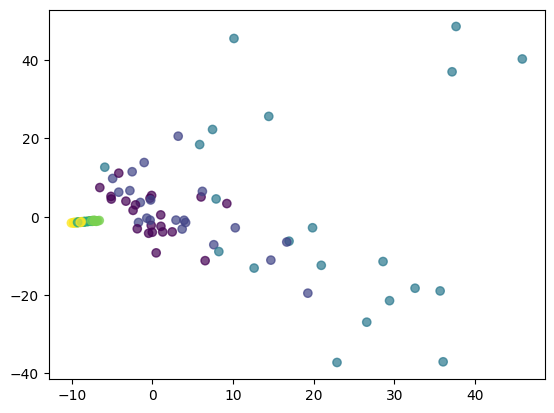

Activity: 1


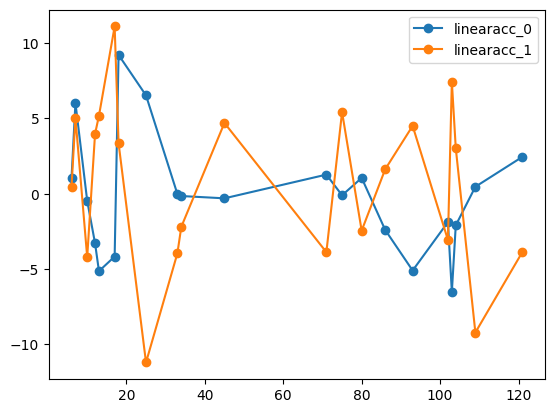

Activity: 2


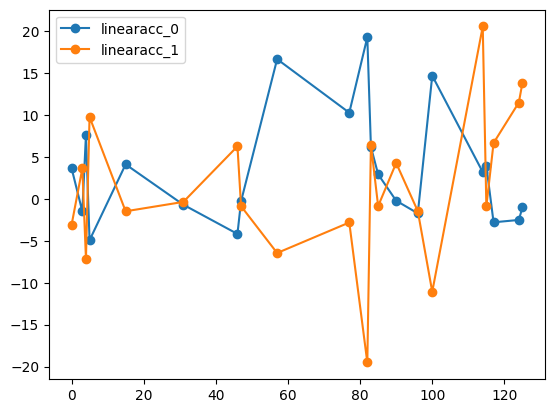

Activity: 3


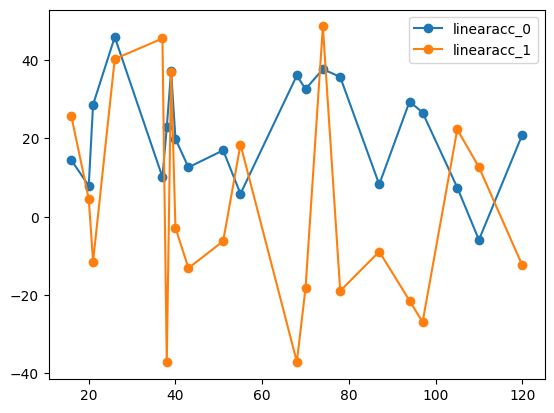

Activity: 4


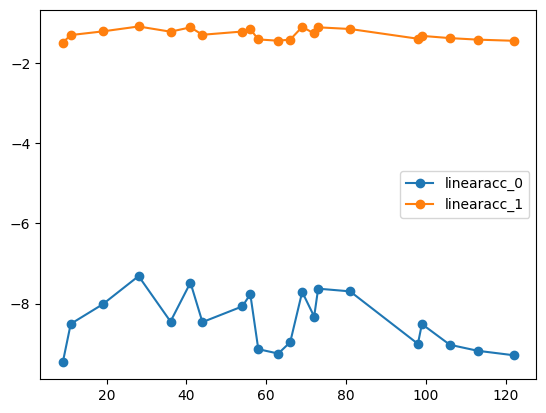

Activity: 5


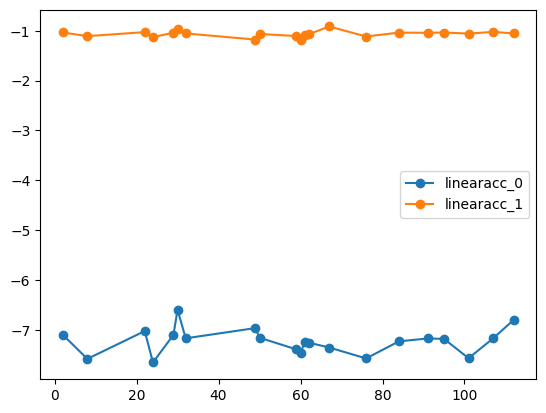

Activity: 6


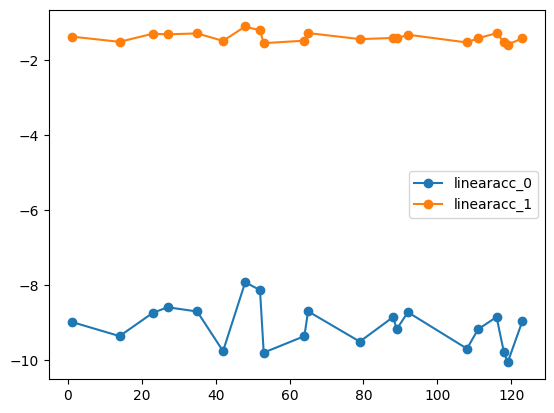

In [11]:
pca = PCA(n_components=2)
# linear_acceleration = np.array([np.ravel(arr) for arr in df_A['Linear acceleration']])
# linear_acceleration = np.array(df_A.loc[i'Linear acceleration'].to_list())
linear_acceleration =dk.copy()

result = pca.fit_transform(linear_acceleration)
df_A['PCA_linear_acc_0']=result[:,0]
df_A['PCA_linear_acc_1']=result[:,1]

df_A_1=pd.concat([df_A.loc[:,'Activity'],df_A.loc[:,'PCA_linear_acc_0'],df_A.loc[:,'PCA_linear_acc_1']],axis=1)
df_A_Groupby = df_A.groupby('Activity')
scatter = plt.scatter(result[:,0],result[:,1],c=y_train,cmap ='viridis',alpha=0.7)
plt.show()
for activity, group in df_A_Groupby:
    print(f"Activity: {activity}")

    median_PCA_linear_acc_0 = group['PCA_linear_acc_0']
    median_PCA_linear_acc_1= group['PCA_linear_acc_1']
    plt.plot(group.index, median_PCA_linear_acc_0, label='linearacc_0', marker='o')
    plt.plot(group.index, median_PCA_linear_acc_1, label='linearacc_1', marker='o')
    plt.legend()
    plt.show()

Task1 Q3 Part 2

Plotting the PCA of TSFEL

In [12]:
!pip install tsfel


   ---------------------------------------- 0.0/55.8 kB ? eta -:--:--
   ------- -------------------------------- 10.2/55.8 kB ? eta -:--:--
   ------- -------------------------------- 10.2/55.8 kB ? eta -:--:--
   ------- -------------------------------- 10.2/55.8 kB ? eta -:--:--
   ---------------------------------------- 55.8/55.8 kB 224.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 2.0 MB/s eta 0:00:05
    --------------------------------------- 0.2/9.9 MB 1.8 MB/s eta 0:00:06
   - -------------------------------------- 0.4/9.9 MB 3.1 MB/s eta 0:00:04
   ---- ----------------------------------- 1.0/9.9 MB 5.3 MB/s eta 0:00:02
   -------- ------------------------------- 2.2/9.9 MB 8.2 MB/s eta 0:00:01
   -------------- ------------------------- 3.7/9.9 MB 10.2 MB/s eta 0:00:01
   ----------------- ---------------------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\rachi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [13]:
def explode_dataframe(df):
    # Repeat the 'Activity' column 500 times for each row
    repeated_activity = df.loc[df.index.repeat(500), 'Activity'].reset_index(drop=True)

    # Explode the lists in each sensor column
    exploded_accX = df['SensorData accX'].apply(pd.Series).stack().reset_index(drop=True)
    exploded_accY = df['SensorData accY'].apply(pd.Series).stack().reset_index(drop=True)
    exploded_accZ = df['SensorData accZ'].apply(pd.Series).stack().reset_index(drop=True)

    # Combine the exploded columns into a new DataFrame
    exploded_df = pd.DataFrame({
        'Activity': repeated_activity,
        'SensorData accX': exploded_accX,
        'SensorData accY': exploded_accY,
        'SensorData accZ': exploded_accZ
    })

    return exploded_df

df3 = explode_dataframe(df_A)
# df3_cleaned = df3.dropna()
# df3

In [14]:
import tsfel
import pandas as pd
cfg = tsfel.get_features_by_domain()


# array_from_df.shape
df_A
X = tsfel.time_series_features_extractor(cfg,df3[["SensorData accX","SensorData accY","SensorData accZ"]],fs = 50,window_size=500)

*** Feature extraction started ***



*** Feature extraction finished ***


In [15]:
X_cleaned = X.dropna(axis=1)
X_cleaned

,SensorData accX_Absolute energy,SensorData accX_Area under the curve,SensorData accX_Autocorrelation,SensorData accX_Average power,SensorData accX_Centroid,SensorData accX_ECDF Percentile Count_0,SensorData accX_ECDF Percentile Count_1,SensorData accX_ECDF Percentile_0,SensorData accX_ECDF Percentile_1,SensorData accX_ECDF_0,...,SensorData accZ_Wavelet variance_0,SensorData accZ_Wavelet variance_1,SensorData accZ_Wavelet variance_2,SensorData accZ_Wavelet variance_3,SensorData accZ_Wavelet variance_4,SensorData accZ_Wavelet variance_5,SensorData accZ_Wavelet variance_6,SensorData accZ_Wavelet variance_7,SensorData accZ_Wavelet variance_8,SensorData accZ_Zero crossing rate
0,428.119592,9.008919,5.0,42.897755,5.005085,100.0,400.0,0.737727,1.086936,0.002,...,0.003322,0.019687,0.049441,0.092600,0.146952,0.206732,0.257520,0.283238,0.278961,0.0
1,32.768542,2.553859,26.0,3.283421,4.955882,100.0,400.0,0.249165,0.262091,0.002,...,0.000828,0.002949,0.006456,0.011349,0.017532,0.024986,0.033706,0.043662,0.054780,0.0
2,478.627177,9.764364,5.0,47.958635,4.989670,100.0,400.0,0.975656,0.980947,0.002,...,0.000127,0.000487,0.001049,0.001795,0.002722,0.003826,0.005097,0.006514,0.008064,0.0
3,477.002571,9.495337,5.0,47.795849,5.010214,100.0,400.0,0.762545,1.075617,0.002,...,0.002664,0.013335,0.032745,0.056265,0.077145,0.097067,0.119095,0.141653,0.162081,2.0
4,530.466450,10.005161,6.0,53.152951,4.997978,100.0,400.0,0.770530,1.234635,0.002,...,0.002535,0.015177,0.040367,0.069588,0.099245,0.131172,0.159307,0.173780,0.171967,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,497.739114,9.755190,3.0,49.873659,4.944363,100.0,400.0,0.784800,1.202131,0.002,...,0.009342,0.034796,0.057884,0.100034,0.153607,0.202996,0.225477,0.211677,0.172606,10.0
122,340.897228,8.207162,84.0,34.158039,4.595538,100.0,400.0,0.776342,0.926267,0.002,...,0.000305,0.001307,0.003269,0.006416,0.010984,0.016855,0.023610,0.030696,0.037616,0.0
123,17.727040,1.878521,43.0,1.776256,5.013382,100.0,400.0,0.183463,0.192260,0.002,...,0.001052,0.003667,0.007924,0.013976,0.021732,0.031070,0.041836,0.053900,0.067207,0.0
124,430.187347,9.028684,5.0,43.104945,4.914747,100.0,400.0,0.732451,1.062091,0.002,...,0.004605,0.020702,0.042012,0.073398,0.119603,0.177105,0.233516,0.276743,0.303233,8.0


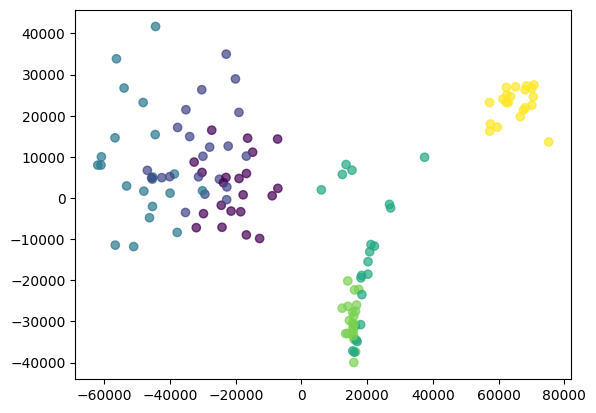

Activity: 1


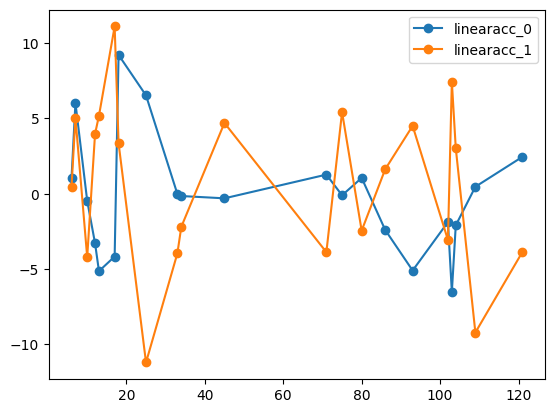

Activity: 2


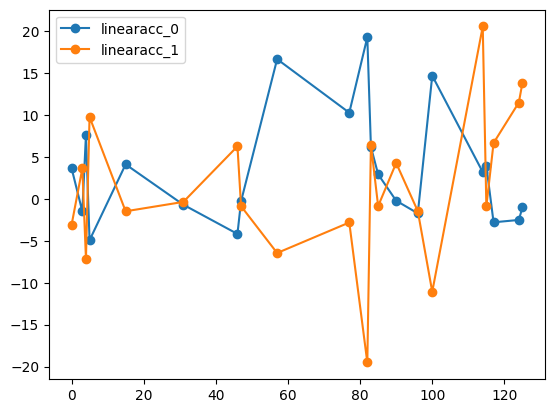

Activity: 3


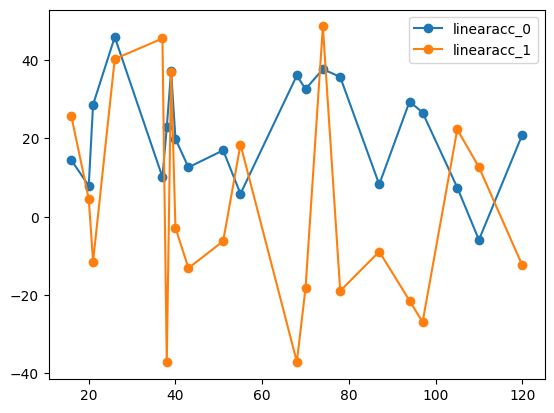

Activity: 4


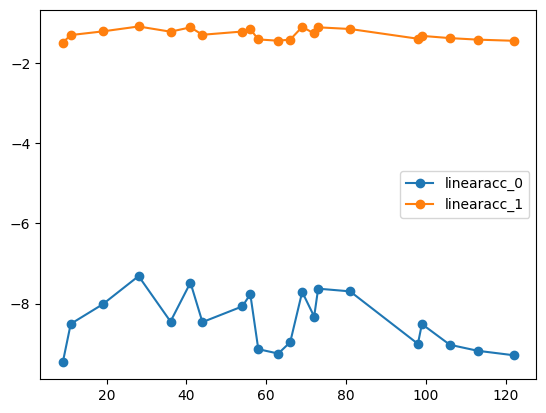

Activity: 5


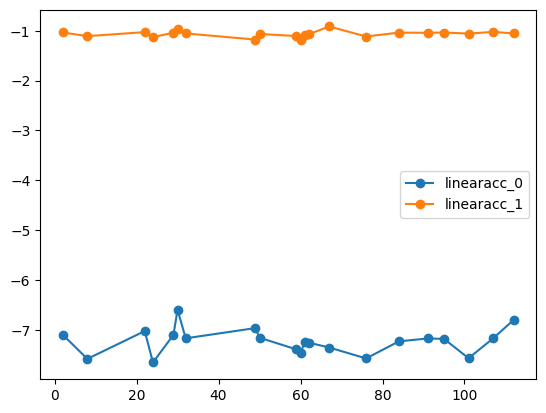

Activity: 6


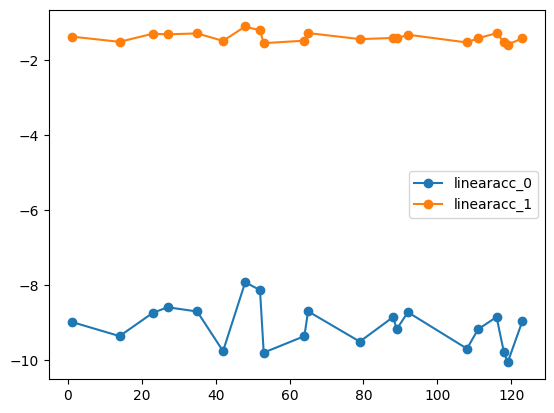

In [16]:
# from sklearn.preprocessing import StandardScaler

# s = StandardScaler()
# r = s.fit_transform(X)
pca = PCA(n_components=2)
result = pca.fit_transform(X)
df_A['PCA_Transformed_0']=result[:,0]
df_A['PCA_Transformed_1']=result[:,1]
scatter = plt.scatter(result[:,0],result[:,1],c=y_train,cmap ='viridis',alpha=0.7)
plt.show()
for activity, group in df_A_Groupby:
    print(f"Activity: {activity}")

    median_PCA_linear_acc_0 = group['PCA_linear_acc_0']
    median_PCA_linear_acc_1= group['PCA_linear_acc_1']
    plt.plot(group.index, median_PCA_linear_acc_0, label='linearacc_0', marker='o')
    plt.plot(group.index, median_PCA_linear_acc_1, label='linearacc_1', marker='o')
    plt.legend()
    plt.show()

Code below this is wrong because we have to use original dataset

We were plotting the plotting the both the graphs but one graph had a different min max values so we can use min_max scaler or plot all the on different graphs we have to use min max scaler

Task1 - *Q3* part-3
PCA on Dataset

We need to convert 3d data to 2d. I have alongated the embedded array in cell to seprated columns then we can use PCA

In [17]:
import seaborn as sns
X_train_d = pd.read_csv('/content/drive/MyDrive/es335-24-fall-assignment-1-master/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
y_train_d = pd.read_csv('/content/drive/MyDrive/es335-24-fall-assignment-1-master/UCI HAR Dataset/train/y_train.txt', delim_whitespace=True, header=None)
X_test_d = pd.read_csv('/content/drive/MyDrive/es335-24-fall-assignment-1-master/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
y_test_d = pd.read_csv('/content/drive/MyDrive/es335-24-fall-assignment-1-master/UCI HAR Dataset/test/y_test.txt', delim_whitespace=True, header=None)
feature_names = pd.read_csv('/content/drive/MyDrive/es335-24-fall-assignment-1-master/UCI HAR Dataset/features.txt', delim_whitespace=True, header=None)[1].values

# Step 2: Assign feature names to the columns
X_train_d.columns = feature_names
X_test_d.columns = feature_names

# Step 3: Concatenate train and test data
X_d = pd.concat([X_train_d, X_test_d], axis=0)
y_d = pd.concat([y_train_d, y_test_d], axis=0)

ModuleNotFoundError: No module named 'seaborn'


Apply PCA on dataset only

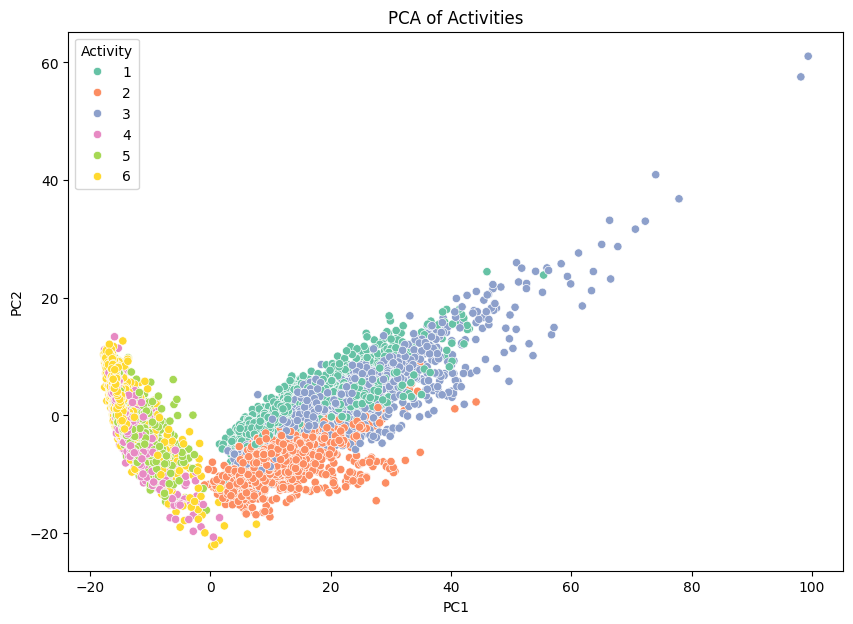

In [ ]:
X_standardized = (X_d - X_d.mean()) / X_d.std()


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)


pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Activity'] = y_d.values.ravel()


plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Activity', palette='Set2', data=pca_df)
plt.title('PCA of Activities')
plt.show()
# df_A_Groupby = df_A.groupby('Activity')
# for activity, group in df_A_Groupby:
#     print(f"Activity: {activity}")
#     median_PCA_Transformed_0 = group['PCA_dataset_0']
#     median_PCA_Transformed_1= group['PCA_dataset_1']
#     plt.plot(group.index, median_PCA_Transformed_0, label='PCA_dataset_0', marker='o')
#     plt.plot(group.index, median_PCA_Transformed_1, label='PCA_dataset_1', marker='o')
#     plt.legend()
#     plt.show()
#     print(' ')

Task -3 Q-4 Best one is TSFL

For better visualisation we need to scale all the data to a single range, for that I have used MinMaxScaler

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Task 1 Question 4

For now we have shown all the correlation matrices later we have to add which features are redundant

Correlation matrix for TSFEL

In [ ]:
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
print(correlation_matrix)
plt.show()
# we have to print max corr also

                                      SensorData accX_Absolute energy  \
SensorData accX_Absolute energy                              1.000000   
SensorData accX_Area under the curve                         0.980882   
SensorData accX_Autocorrelation                             -0.291877   
SensorData accX_Average power                                1.000000   
SensorData accX_Centroid                                     0.139950   
...                                                               ...   
SensorData accZ_Wavelet variance_5                           0.273539   
SensorData accZ_Wavelet variance_6                           0.261121   
SensorData accZ_Wavelet variance_7                           0.244412   
SensorData accZ_Wavelet variance_8                           0.217550   
SensorData accZ_Zero crossing rate                           0.486364   

                                      SensorData accX_Area under the curve  \
SensorData accX_Absolute energy              

<Figure size 1200x800 with 0 Axes>

Correlation matrix of dataset

Task 2 Question 1 Decision Tree on Raw Acceleration

In [ ]:
X_train.shape,y_train.shape

((126, 500, 3), (126,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score
m=[]
for i in range(2,9):
    nsample,ntime,nfeature = X_train.shape
    xflat = X_train.reshape(nsample,-1)
    clf = DecisionTreeClassifier(random_state=42, max_depth=i)
    clf.fit(xflat,y_train)
    m.append(f1_score(y_test,clf.predict(X_test.reshape(X_test.shape[0],-1)),average='weighted'))
print(max(m), (m.index(max(m))))
clf = DecisionTreeClassifier(random_state=42, max_depth=m.index(max(m))+2)
clf.fit(xflat,y_train)
print(accuracy_score(y_test,clf.predict(X_test.reshape(X_test.shape[0],-1))))
print(precision_score(y_test,clf.predict(X_test.reshape(X_test.shape[0],-1)),average='macro'))
print(recall_score(y_test,clf.predict(X_test.reshape(X_test.shape[0],-1)),average='macro'))
print(f1_score(y_test,clf.predict(X_test.reshape(X_test.shape[0],-1)),average='macro'))
print(f1_score(y_test,clf.predict(X_test.reshape(X_test.shape[0],-1)),average='micro'))

0.5972222222222222 2
0.6111111111111112
0.6605339105339105
0.611111111111111
0.5972222222222222
0.6111111111111112


Task2 -Question 1 Decision Tree on TSFEL

In [ ]:
df_X = pd.DataFrame({
    'Activity': y_test,
    'SensorData accX': [i for i in X_test[:,:,0]],
    'SensorData accY': [i for i in X_test[:,:,1]],
    'SensorData accZ': [i for i in X_test[:,:,2]]
})
def explode_dataframe(df):
    # Repeat the 'Activity' column 500 times for each row
    repeated_activity = df.loc[df.index.repeat(500), 'Activity'].reset_index(drop=True)

    # Explode the lists in each sensor column
    exploded_accX = df['SensorData accX'].apply(pd.Series).stack().reset_index(drop=True)
    exploded_accY = df['SensorData accY'].apply(pd.Series).stack().reset_index(drop=True)
    exploded_accZ = df['SensorData accZ'].apply(pd.Series).stack().reset_index(drop=True)

    # Combine the exploded columns into a new DataFrame
    exploded_df = pd.DataFrame({
        'Activity': repeated_activity,
        'SensorData accX': exploded_accX,
        'SensorData accY': exploded_accY,
        'SensorData accZ': exploded_accZ
    })

    return exploded_df

df4 = explode_dataframe(df_X)
# df3_cleaned = df3.dropna()
# df3

In [ ]:
df4

,Activity,SensorData accX,SensorData accY,SensorData accZ
0,3,0.707837,0.073081,0.022832
1,3,0.662446,0.051443,-0.008161
2,3,0.705374,0.103841,0.053599
3,3,0.707006,0.124610,0.131958
4,3,0.729015,0.148530,0.161656
...,...,...,...,...
26995,4,1.015294,0.084852,-0.108842
26996,4,1.018103,0.084293,-0.111572
26997,4,1.020311,0.085078,-0.113530
26998,4,1.019532,0.084253,-0.115210


In [ ]:
import tsfel
import pandas as pd
cfg = tsfel.get_features_by_domain()


# array_from_df.shape
df_A
X_x = tsfel.time_series_features_extractor(cfg,df4[["SensorData accX","SensorData accY","SensorData accZ"]],fs = 50,window_size=500)

*** Feature extraction started ***



*** Feature extraction finished ***


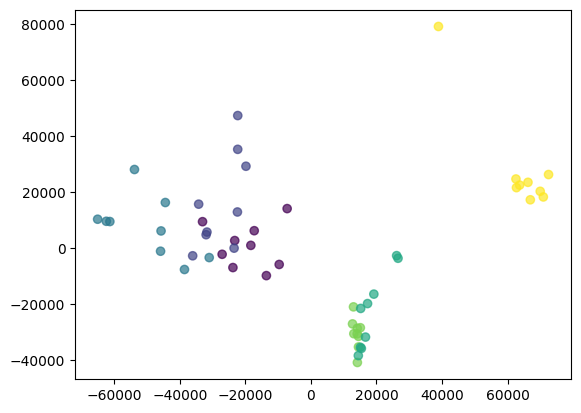

In [ ]:
# from sklearn.preprocessing import StandardScaler

# s = StandardScaler()
# r = s.fit_transform(X)
pca = PCA(n_components=2)
result = pca.fit_transform(X_x)
df_X['PCA_Transformed_0']=result[:,0]
df_X['PCA_Transformed_1']=result[:,1]
scatter = plt.scatter(result[:,0],result[:,1],c=y_test,cmap ='viridis',alpha=0.7)
plt.show()

Task 2 Question

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming df_A and df_X are already defined
scaler = MinMaxScaler()

# Feature scaling
df_tsfel = scaler.fit_transform(np.array(X))
df_tsfel_ytrain = np.array(df_A['Activity'])

df_tsfel_X_test = scaler.fit_transform(np.array(X_x))
df_tsfel_ytest = np.array(df_X['Activity'])

# Flatten the features for training
nsample, ntime = df_tsfel.shape
xflat = df_tsfel.reshape(nsample, -1)

# List to store F1 scores
m = []

# Training and evaluating the model with different depths
for j in range (2,150):
  for i in range(2, 9):
      clf = DecisionTreeClassifier(random_state=j, max_depth=i)
      clf.fit(xflat, df_tsfel_ytrain)

      # Reshape the test set and predict
      y_pred = clf.predict(df_tsfel_X_test.reshape(df_tsfel_X_test.shape[0], -1))

      # Calculate weighted F1 score
      m.append(f1_score(df_tsfel_ytest, y_pred, average='macro'))

# Find the maximum F1 score and its corresponding depth
best_depth = m.index(max(m)) +2  # Adding 2 because range starts from 2
print("Best F1 Score:", max(m), "at depth:", best_depth%8)

# Train the model with the best depth
clf = DecisionTreeClassifier(random_state=j, max_depth=best_depth)
clf.fit(xflat, df_tsfel_ytrain)

# Predict and evaluate the model
y_pred_final = clf.predict(df_tsfel_X_test.reshape(df_tsfel_X_test.shape[0], -1))

print("Accuracy:", accuracy_score(df_tsfel_ytest, y_pred_final))
print("Precision (macro):", precision_score(df_tsfel_ytest, y_pred_final, average='macro'))
print("Recall (macro):", recall_score(df_tsfel_ytest, y_pred_final, average='macro'))
print("F1 Score (macro):", f1_score(df_tsfel_ytest, y_pred_final, average='macro'))
print("F1 Score (micro):", f1_score(df_tsfel_ytest, y_pred_final, average='micro'))

Best F1 Score: 0.9451496388028896 at depth: 4
Accuracy: 0.8888888888888888
Precision (macro): 0.8970117845117845
Recall (macro): 0.8888888888888888
F1 Score (macro): 0.8882539273019149
F1 Score (micro): 0.8888888888888888


Task2 -Q3

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming X_train_d, X_test_d, y_train_d, y_test_d are already defined
scaler = MinMaxScaler()

# Feature scaling
df_tsfel_X_train = scaler.fit_transform(np.array(X_train_d))
df_tsfel_ytrain = np.array(y_train_d).ravel()

df_tsfel_X_test = scaler.transform(np.array(X_test_d))
df_tsfel_ytest = np.array(y_test_d).ravel()

# Flatten the features for training
nsample, ntime = df_tsfel_X_train.shape
xflat = df_tsfel_X_train.reshape(nsample, -1)

# List to store F1 scores
m = []

# Training and evaluating the model with different depths
for i in range(2, 8):
    clf = DecisionTreeClassifier(random_state=42, max_depth=i)
    clf.fit(xflat, df_tsfel_ytrain)

    # Reshape the test set and predict
    y_pred = clf.predict(df_tsfel_X_test.reshape(df_tsfel_X_test.shape[0], -1))

    # Calculate weighted F1 score
    m.append(f1_score(df_tsfel_ytest, y_pred, average='weighted'))

# Find the maximum F1 score and its corresponding depth
best_depth = m.index(max(m)) + 2  # Adding 2 because range starts from 2
print("Best F1 Score:", max(m), "at depth:", best_depth)

# Train the model with the best depth
clf = DecisionTreeClassifier(random_state=42, max_depth=best_depth)
clf.fit(xflat, df_tsfel_ytrain)

# Predict and evaluate the model
y_pred_final = clf.predict(df_tsfel_X_test.reshape(df_tsfel_X_test.shape[0], -1))

print("Accuracy:", accuracy_score(df_tsfel_ytest, y_pred_final))
print("Precision (macro):", precision_score(df_tsfel_ytest, y_pred_final, average='macro'))
print("Recall (macro):", recall_score(df_tsfel_ytest, y_pred_final, average='macro'))
print("F1 Score (macro):", f1_score(df_tsfel_ytest, y_pred_final, average='macro'))
print("F1 Score (micro):", f1_score(df_tsfel_ytest, y_pred_final, average='micro'))


Best F1 Score: 0.8611902519838394 at depth: 7
Accuracy: 0.8618934509670851
Precision (macro): 0.8622138247237005
Recall (macro): 0.8582468574433723
F1 Score (macro): 0.858958226175725
F1 Score (micro): 0.8618934509670851


Task 3 Question 1

In [1]:
%pip install -U langchain-groq


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\rachi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/125.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/125.2 kB ? eta -:--:--
     --------- ----------------------------- 30.7/125.2 kB 1.3 MB/s eta 0:00:01
     ------------ ------------------------ 41.0/125.2 kB 653.6 kB/s eta 0:00:01
     ------------ ------------------------ 41.0/125.2 kB 653.6 kB/s eta 0:00:01
     ------------------------------------ 125.2/125.2 kB 815.2 kB/s eta 0:00:00
     ---------------------------------------- 0.0/51.7 kB ? eta -:--:--
     ---------------------------------------- 51.7/51.7 kB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/103.5 kB ? eta -:--:--
   ---------------------------------------- 103.5/103.5 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/394.9 kB ? eta -:--:--
   ---------------------------------------  389.1/394.9 kB 8.1 MB/s eta 0:00:01
   ---------------------------------------- 394.9/394.9 kB 6.1 MB/s eta 0:00:00